In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import keras

In [ ]:
(x_train, y_train) ,(x_test, y_test) = tf.keras.datasets.cifar10.load_data()  

In [ ]:
print('training images: {}'.format(x_train.shape))
print('training images: {}'.format(x_test.shape))

training images: (50000, 32, 32, 3)
training images: (10000, 32, 32, 3)


In [ ]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
print(x_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [ ]:
print(x_train[0].shape)

(32, 32, 3)


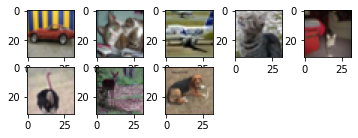

In [ ]:
for i in range(330,338):
  plt.subplot(120+1+i)
  img=x_train[i]
  plt.imshow(img)

In [ ]:
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_test=x_test.reshape(x_test.shape[0],32,32,3)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
n_classes=10
print("shape before one-hot encoding:",y_train.shape)
Y_train=np_utils.to_categorical(y_train,n_classes)
Y_test=np_utils.to_categorical(y_test,n_classes)
print("shape after one-hot encoding:",Y_train.shape)

shape before one-hot encoding: (50000, 1)
shape after one-hot encoding: (50000, 10)


# **Building the data model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
model=Sequential()

#convolution layers
model.add(Conv2D(50,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))

model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125,kernel_size=(2,2),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#hideen layer
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
#output layer
model.add(Dense(10,activation='softmax'))

#compiling
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

#training the model
model.fit(x_train, Y_train, batch_size=128, epochs=10, validation_data=(x_test,Y_test))

Epoch 1/10
391/391 [==============================] - 469s 1s/step - loss: 1.5445 - accuracy: 0.4396 - val_loss: 1.1746 - val_accuracy: 0.5923
Epoch 2/10
391/391 [==============================] - 474s 1s/step - loss: 1.1061 - accuracy: 0.6063 - val_loss: 0.9536 - val_accuracy: 0.6686
Epoch 3/10
391/391 [==============================] - 478s 1s/step - loss: 0.9422 - accuracy: 0.6683 - val_loss: 0.8563 - val_accuracy: 0.7002
Epoch 4/10
391/391 [==============================] - 471s 1s/step - loss: 0.8323 - accuracy: 0.7059 - val_loss: 0.7782 - val_accuracy: 0.7289
Epoch 5/10
391/391 [==============================] - 470s 1s/step - loss: 0.7550 - accuracy: 0.7361 - val_loss: 0.7595 - val_accuracy: 0.7323
Epoch 6/10
391/391 [==============================] - 472s 1s/step - loss: 0.6293 - accuracy: 0.7783 - val_loss: 0.7058 - val_accuracy: 0.7547
Epoch 8/10
391/391 [==============================] - 473s 1s/step - loss: 0.5716 - accuracy: 0.7989 - val_loss: 0.7023 - val_accuracy: 0.7608

In [ ]:
classes=range(0,10)
names=['airpalne',
       'automobile',
       'bird','cat','deer','dog','frog','horse','ship','truck']
class_labels=dict(zip(classes,names))
batch=x_test[100:109]
labels=np.argmax(Y_test[100:109],axis=-1)

#make predictions
predictions=model.predict(batch,verbose=1)

1/1 [==============================] - 0s 98ms/step


In [ ]:
print(predictions)

[[5.8517871e-06 4.1139590e-09 1.2106961e-02 4.9679797e-02 4.2498916e-01
  8.0595464e-02 4.2434191e-04 4.3217090e-01 1.6608334e-05 1.0986822e-05]
 [1.6401800e-05 1.4249486e-06 4.3418627e-02 1.3772024e-01 9.2596255e-02
  5.9415150e-01 9.1456428e-02 3.8614344e-02 1.9832531e-03 4.1548730e-05]
 [4.3886857e-06 2.1787933e-05 6.9628363e-03 1.2223567e-02 6.2047155e-05
  5.0467267e-03 9.7209680e-01 3.2178084e-03 3.4159148e-04 2.2465798e-05]
 [2.5268690e-07 9.8075503e-09 1.0306760e-04 9.6734548e-01 3.7598535e-03
  4.7044898e-03 2.3556370e-02 5.0879328e-04 1.9619863e-06 1.9803969e-05]
 [9.4555617e-06 9.9803287e-01 4.2817053e-10 4.4293785e-08 2.5434871e-11
  7.5799492e-11 1.0557553e-10 1.6975835e-09 4.0991773e-04 1.5478081e-03]
 [6.2161664e-05 9.9618006e-01 5.2162778e-07 1.8515898e-06 8.8410976e-09
  8.1707427e-08 5.0152085e-08 8.4458573e-10 3.0251353e-03 7.3009252e-04]
 [2.1967513e-02 1.6446589e-04 4.7398325e-02 8.3359981e-01 2.1800619e-04
  1.2948358e-02 2.5071789e-02 2.9141476e-04 5.7934467e-02 